# Content and Objectives

- Show received signals in flat and frequency-selective fading
- rect signal (in baseband) being transmitted by both kinds of channels

## Import

In [1]:
# importing
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

# interactive content
from ipywidgets import interactive
import ipywidgets as widgets

# showing figures inline
%matplotlib inline

In [2]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=matplotlib.checkdep_usetex(True))

matplotlib.rc('figure', figsize=(15, 5) )

C:\Users\Schmalen\AppData\Local\Temp\ipykernel_18396\1688620825.py:4: MatplotlibDeprecationWarning: The checkdep_usetex function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use a vendored copy of this function instead.
  plt.rc('text', usetex=matplotlib.checkdep_usetex(True))


## Parameters

In [3]:
# symbol time (length of signal)
t_symb = 1.0

# sample frequency and frequency regime
f_s = 1e2
N_f = 512
f = np.arange( -f_s/2, f_s/2, f_s/N_f )
t = np.arange(0, N_f/f_s, 1/f_s)

# define spectrum of pulse shape in the frequency regime as modulated sinc 
X = t_symb * np.sinc( t_symb * f ) * np.exp( -1j * 2 * np.pi * f * t_symb )
X[ np.isnan( X ) ] = t_symb


## Flat fading

In [4]:
# delay of paths
tau = [ 0.0, 0.025 ]

# get frequency response of the channel
H = np.zeros_like( f , dtype = complex )    
for ind_tau, val_tau in enumerate( tau ):
    H += np.exp( - 1j * 2 * np.pi * f * val_tau ) 

# get output frequency response
Y = H * X

# get according signals in time domain
x = np.fft.ifft( np.fft.fftshift( X ) )
y = np.fft.ifft( np.fft.fftshift( Y ) )

### Plotting

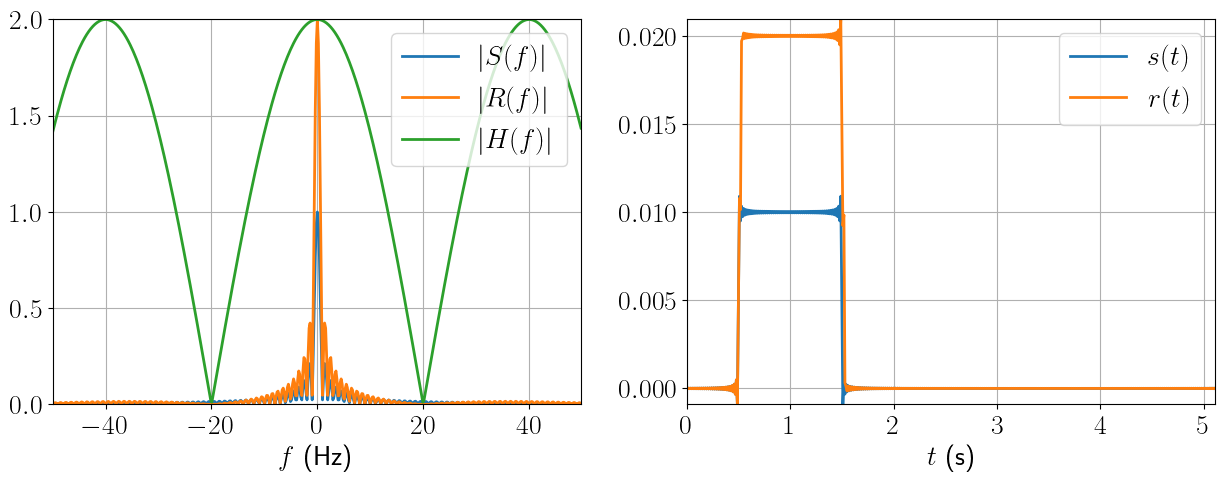

In [5]:
# plotting results
plt.subplot( 121 )
plt.plot( f, np.abs( X ), linewidth = 2.0, label='$|S(f)|$' )
plt.plot( f, np.abs( Y ), linewidth = 2.0, label='$|R(f)|$' )
plt.plot( f, np.abs( H ), linewidth = 2.0, label='$|H(f)|$' )

plt.xlabel('$f$ (Hz)')
plt.grid( True )    
plt.autoscale(enable=True, tight=True)
plt.legend( loc = 'upper right' )

plt.subplot( 122 )
plt.plot( t, np.real( x ), linewidth = 2.0, label='$s(t)$' )    
plt.plot( t, np.real( y ), linewidth = 2.0, label='$r(t)$' )

plt.xlim( (0, 3) )
plt.xlabel( '$t$ (s)' )
plt.grid( True )
plt.autoscale(enable=True, tight=True)
plt.legend( loc = 'upper right' )
#plt.savefig('illustration_flat.pdf',bbox_inches='tight')

## Frequency-selective fading

In [6]:
# activate for example as in the lecture
if 1:
    # channel freq. selective as on slides
    tau = [ 0.0, .5]

# activate for multiple echos sampled randomly
if 0:
    # channel flat w. multiple echos
    N_tau = 11
    tau_max = .5
    
    tau = np.sort( tau_max * np.random.rand( N_tau )  )
    tau[ 0 ] = 0.0
    tau[ N_tau - 1 ] = tau_max

# get frequency response of the channel
H = np.zeros_like( f, dtype = complex )    
for ind_tau, val_tau in enumerate( tau ):
    H += np.exp( - 1j * 2 * np.pi * f * val_tau ) 

# get output frequency response
Y = H * X

# get according signals in time domain
x = np.fft.ifft( np.fft.fftshift( X ) )
y = np.fft.ifft( np.fft.fftshift( Y ) )

### Plotting

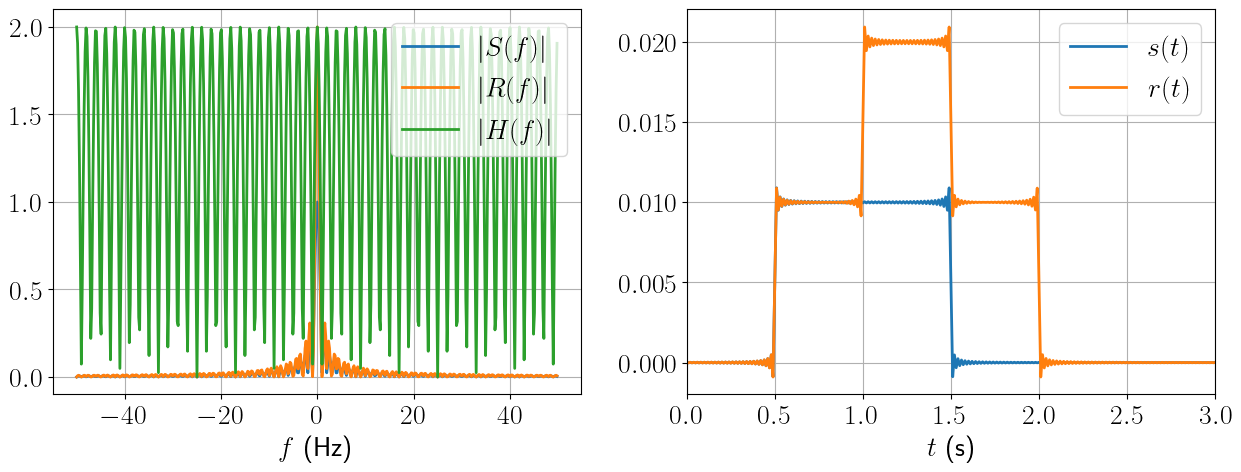

In [7]:
# plotting results
plt.subplot( 121 )
plt.plot( f, np.abs( X ), linewidth = 2.0, label='$|S(f)|$' )
plt.plot( f, np.abs( Y ), linewidth = 2.0, label='$|R(f)|$' )
plt.plot( f, np.abs( H ), linewidth = 2.0, label='$|H(f)|$' )

plt.xlabel('$f$ (Hz)')
plt.grid( True )    
plt.legend( loc = 'upper right' )

plt.subplot( 122 )
plt.plot( t, np.real( x ), linewidth = 2.0, label='$s(t)$' )    
plt.plot( t, np.real( y ), linewidth = 2.0, label='$r(t)$' )

plt.xlim( (0, 3) )
plt.xlabel( '$t$ (s)' )
plt.grid( True )
plt.legend( loc = 'upper right' )
#plt.savefig('illustration_freq_selective.pdf',bbox_inches='tight')

# Interactive Demos

## Demo 1: Show effect of 2-tap channel
We consider a channel with impulse response $h(t) = \delta(t) + \delta(t-\tau)$ and the transmission of a rectangular pulse of duration $T$

In [12]:
def interactive_plot_pulse(tau1, T):
    # sample frequency and frequency regime
    f_s = 1e2
    N_f = 32768
    f = np.arange( -f_s/2, f_s/2, f_s/N_f )
    t = np.arange(0, N_f/f_s, 1/f_s)
    

    # channel freq. selective as on slides
    tau = [ 0.0, tau1]
    N_tau = 2

    # get frequency response of the channel
    H = np.zeros_like( f, dtype = complex )    
    for ind_tau, val_tau in enumerate( tau ):
        H += np.exp( - 1j * 2 * np.pi * f * val_tau ) / N_tau

    # define spectrum of pulse shape in the frequency regime as modulated sinc 
    X = T * np.sinc( T * f ) * np.exp( -1j * 2 * np.pi * f * T )
    X[ np.isnan( X ) ] = T
    
    # get output frequency response
    Y = H * X

    # get according signals in time domain
    x = np.fft.ifft( np.fft.fftshift( X ) )
    y = np.fft.ifft( np.fft.fftshift( Y ) )
    
    plt.figure(1,figsize=(15,6))
    plt.rcParams.update({'font.size': 14})

    plt.subplot( 121 )
    plt.plot( f, np.abs( X ), linewidth = 2.0, label='$|S(f)|$' )
    plt.plot( f, np.abs( Y ), linewidth = 2.0, label='$|R(f)|$' )
    plt.plot( f, np.abs( H ), linewidth = 2.0, label='$|H(f)|$' )

    plt.xlabel('$f$ (Hz)')
    plt.xlim( (-5, 5) )
    plt.grid( True )    
    plt.legend( loc = 'upper right' )

    plt.subplot( 122 )
    plt.plot( t, np.real( x ), linewidth = 2.0, label='$s(t)$' )    
    plt.plot( t, np.real( y ), linewidth = 2.0, label='$r(t)$' )
    
    plt.xlim( (0, 4*T) )
    plt.xlabel( '$t$ (s)' )
    plt.grid( True )
    plt.legend( loc = 'upper right' )
    plt.show()

In [13]:
style = {'description_width': 'initial'}
interactive_update = interactive(interactive_plot_pulse, \
                                 tau1 = widgets.FloatSlider(min=0.025,max=0.3,step=0.001,value=0.2, continuous_update=False, description=r'Delay $\tau$ (s)', layout=widgets.Layout(width='75%'), style=style), \
                                 T = widgets.FloatSlider(min=0.01,max=1,step=0.01,value=1, continuous_update=False, description=r'Symbol duration $T$ (s)', layout=widgets.Layout(width='75%'), style=style))


output = interactive_update.children[-1]
output.layout.height = '450px'
interactive_update

interactive(children=(FloatSlider(value=0.2, continuous_update=False, description='Delay $\\tau$ (s)', layout=…

## Demo 2: Show effect of multi-tap channel
We consider a channel with impulse response 
$$
h(t) = \sum_{i=0}^{N_{\tau}}\delta(t - \tau_i)
$$
where the $\tau_i$ are randomly chosen between $0$ and $\tau_{\max}$. Again, we show the effect on the transmission of a rectangular pulse of duration $T$.

In [10]:
def interactive_plot_Npulses(N_tau, T):
    # sample frequency and frequency regime
    f_s = 1e2
    N_f = 32768
    f = np.arange( -f_s/2, f_s/2, f_s/N_f )
    t = np.arange(0, N_f/f_s, 1/f_s)
    

    # channel freq. selective as on slides
    tau_max = .5
    
    tau = np.sort( tau_max * np.random.rand( N_tau )  )
    tau[ 0 ] = 0.0
    tau[ N_tau - 1 ] = tau_max    
    
    # get frequency response of the channel
    H = np.zeros_like( f, dtype = complex )    
    for _, val_tau in enumerate( tau ):
        H += np.exp( - 1j * 2 * np.pi * f * val_tau ) / N_tau

    # define spectrum of pulse shape in the frequency regime as modulated sinc 
    X = np.sinc( T * f ) * np.exp( -1j * 2 * np.pi * f * T )
    X[ np.isnan( X ) ] = T
    
    # get output frequency response
    Y = H * X

    # get according signals in time domain
    x = np.fft.ifft( np.fft.fftshift( X ) )
    y = np.fft.ifft( np.fft.fftshift( Y ) )
      
    plt.figure(1,figsize=(15,6))
    plt.rcParams.update({'font.size': 14})

    plt.subplot( 121 )
    plt.plot( f, np.abs( X ), linewidth = 2.0, label='$|S(f)|$' )
    plt.plot( f, np.abs( Y ), linewidth = 2.0, label='$|R(f)|$' )
    plt.plot( f, np.abs( H ), linewidth = 2.0, label='$|H(f)|$' )

    plt.xlabel('$f$ (Hz)')
    plt.xlim( (-5, 5) )
    plt.grid( True )    
    plt.legend( loc = 'upper right' )

    plt.subplot( 122 )
    plt.plot( t, np.real( x ), linewidth = 2.0, label='$s(t)$' )    
    plt.plot( t, np.real( y ), linewidth = 2.0, label='$r(t)$' )
    
    plt.xlim( (0, 4*T) )
    plt.xlabel( '$t$ (s)' )
    plt.grid( True )
    plt.legend( loc = 'upper right' )
    plt.show()

In [11]:
style = {'description_width': 'initial'}
interactive_update = interactive(interactive_plot_Npulses, \
                                 N_tau = widgets.IntSlider(min=1,max=20,step=1,value=2, continuous_update=False, description=r'Number of taps', layout=widgets.Layout(width='75%'), style=style), \
                                 T = widgets.FloatSlider(min=0.01,max=1,step=0.01,value=1, continuous_update=False, description=r'Symbol duration $T$ (s)', layout=widgets.Layout(width='75%'), style=style))


output = interactive_update.children[-1]
output.layout.height = '450px'
interactive_update

interactive(children=(IntSlider(value=2, continuous_update=False, description='Number of taps', layout=Layout(…